In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('user_balance_table.csv', engine='python') 

In [12]:
total_purchase_amt = data.groupby(['report_date'])['total_purchase_amt'].sum()
total_purchase_amt = pd.DataFrame({'total_purchase_amt':total_purchase_amt})
total_redeem_amt= data.groupby(['report_date'])['total_redeem_amt'].sum()
total_redeem_amt= pd.DataFrame({'total_redeem_amt':total_redeem_amt})
df =  total_purchase_amt.merge(total_redeem_amt,left_index=True,right_index=True, how='left')
df.reset_index(inplace=True)

In [13]:
df

,report_date,total_purchase_amt,total_redeem_amt
0,20130701,32488348,5525022
1,20130702,29037390,2554548
2,20130703,27270770,5953867
3,20130704,18321185,6410729
4,20130705,11648749,2763587
...,...,...,...
422,20140827,302194801,468164147
423,20140828,245082751,297893861
424,20140829,267554713,273756380
425,20140830,199708772,196374134


In [14]:
#coding=utf-8
import pandas as pd

df.to_csv("data_total.csv",index=False,sep=',')
data = pd.read_csv('data_total.csv')
print(data)

     report_date  total_purchase_amt  total_redeem_amt
0       20130701            32488348           5525022
1       20130702            29037390           2554548
2       20130703            27270770           5953867
3       20130704            18321185           6410729
4       20130705            11648749           2763587
..           ...                 ...               ...
422     20140827           302194801         468164147
423     20140828           245082751         297893861
424     20140829           267554713         273756380
425     20140830           199708772         196374134
426     20140831           275090213         292943033

[427 rows x 3 columns]


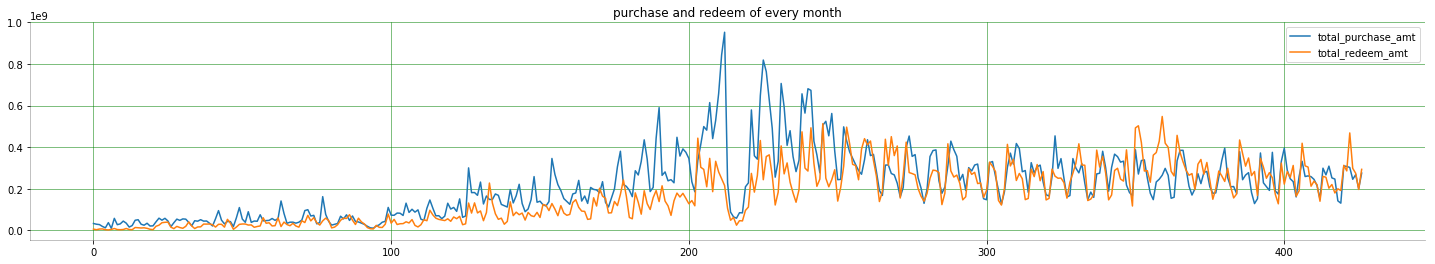

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25, 4.0)  # set figure size

df[['total_purchase_amt', 'total_redeem_amt']].plot()
plt.grid(True, linestyle="-", color="green", linewidth="0.5")
plt.legend()
plt.title('purchase and redeem of every month')

plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)

plt.show()

In [16]:
data_train= data[data['report_date']<20140800]
data_test =data[data['report_date']>20140800]
data_test

,report_date,total_purchase_amt,total_redeem_amt
396,20140801,374884735,252540858
397,20140802,189092130,172250225
398,20140803,173825397,127125217
399,20140804,330640884,322907524
400,20140805,394780870,221706539
401,20140806,288821016,282346594
402,20140807,247646474,253659514
403,20140808,233903717,311648757
404,20140809,160262764,163611708
405,20140810,259534870,189909225


In [17]:
data_train.to_csv("train.csv",index=False,sep=',')

In [18]:
data_test.to_csv("test.csv",index=False,sep=',')
data_test

,report_date,total_purchase_amt,total_redeem_amt
396,20140801,374884735,252540858
397,20140802,189092130,172250225
398,20140803,173825397,127125217
399,20140804,330640884,322907524
400,20140805,394780870,221706539
401,20140806,288821016,282346594
402,20140807,247646474,253659514
403,20140808,233903717,311648757
404,20140809,160262764,163611708
405,20140810,259534870,189909225


In [19]:
import math
import numpy
import pandas
from keras.layers import LSTM, RNN, GRU, SimpleRNN
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import os

numpy.random.seed(123)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 64)             26880     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 31)                1023      
Total params: 41,375
Trainable params: 41,375
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
21/21 - 0s - loss: 0.0734
Epoch 2/150
21/21 - 0s - loss: 0.0336
Epoch 3/150
21/21 - 0s - loss: 0.0198
Epoch 4/150
21/21 - 0s - loss: 0.0182
Epoch 5/150
21/21 - 0s - loss: 0.0177
Epoch 6/150
21/21 - 0s - loss: 0.0171
Epoch 7/150
21/21 - 

Epoch 15/230
21/21 - 0s - loss: 0.0208
Epoch 16/230
21/21 - 0s - loss: 0.0207
Epoch 17/230
21/21 - 0s - loss: 0.0205
Epoch 18/230
21/21 - 0s - loss: 0.0201
Epoch 19/230
21/21 - 0s - loss: 0.0200
Epoch 20/230
21/21 - 0s - loss: 0.0197
Epoch 21/230
21/21 - 0s - loss: 0.0196
Epoch 22/230
21/21 - 0s - loss: 0.0189
Epoch 23/230
21/21 - 0s - loss: 0.0187
Epoch 24/230
21/21 - 0s - loss: 0.0183
Epoch 25/230
21/21 - 0s - loss: 0.0181
Epoch 26/230
21/21 - 0s - loss: 0.0178
Epoch 27/230
21/21 - 0s - loss: 0.0176
Epoch 28/230
21/21 - 0s - loss: 0.0174
Epoch 29/230
21/21 - 0s - loss: 0.0174
Epoch 30/230
21/21 - 0s - loss: 0.0170
Epoch 31/230
21/21 - 0s - loss: 0.0169
Epoch 32/230
21/21 - 0s - loss: 0.0167
Epoch 33/230
21/21 - 0s - loss: 0.0166
Epoch 34/230
21/21 - 0s - loss: 0.0166
Epoch 35/230
21/21 - 0s - loss: 0.0163
Epoch 36/230
21/21 - 0s - loss: 0.0162
Epoch 37/230
21/21 - 0s - loss: 0.0162
Epoch 38/230
21/21 - 0s - loss: 0.0161
Epoch 39/230
21/21 - 0s - loss: 0.0161
Epoch 40/230
21/21 - 0s -

Epoch 222/230
21/21 - 0s - loss: 0.0104
Epoch 223/230
21/21 - 0s - loss: 0.0104
Epoch 224/230
21/21 - 0s - loss: 0.0103
Epoch 225/230
21/21 - 0s - loss: 0.0104
Epoch 226/230
21/21 - 0s - loss: 0.0104
Epoch 227/230
21/21 - 0s - loss: 0.0103
Epoch 228/230
21/21 - 0s - loss: 0.0103
Epoch 229/230
21/21 - 0s - loss: 0.0102
Epoch 230/230
21/21 - 0s - loss: 0.0104
    report_date     purchase       redeem
0      20140801  175447552.0  195610048.0
1      20140802  126245832.0  166225264.0
2      20140803  153766528.0  181986544.0
3      20140804  240439104.0  234199808.0
4      20140805  287996768.0  254047200.0
5      20140806  302462784.0  227974320.0
6      20140807  260994832.0  204355056.0
7      20140808  203570208.0  185608784.0
8      20140809  150629184.0  175471888.0
9      20140810  154012624.0  156316736.0
10     20140811  242087136.0  228247664.0
11     20140812  281202848.0  253389840.0
12     20140813  291132896.0  238922160.0
13     20140814  255826080.0  216342624.0
14     201

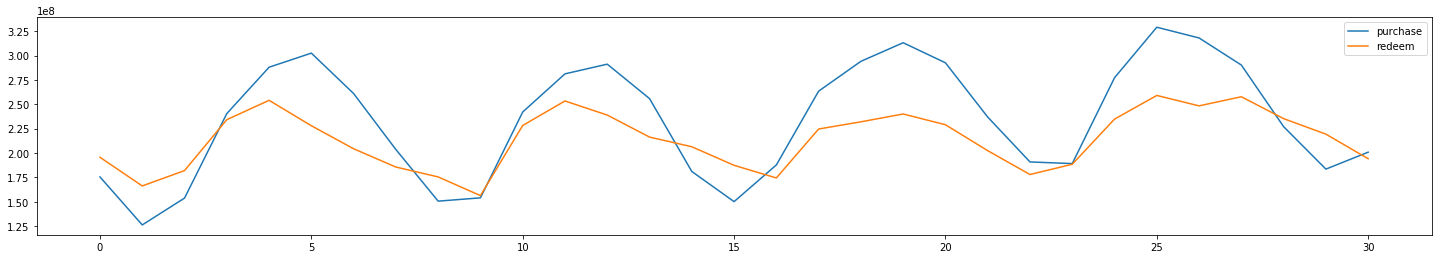

In [20]:
class RNNModel(object):
    def __init__(self, look_back=1, epochs_purchase=20, epochs_redeem=40, batch_size=1, verbose=2, patience=10, store_result=False):
        self.look_back = look_back
        self.epochs_purchase = epochs_purchase
        self.epochs_redeem = epochs_redeem
        self.batch_size = batch_size
        self.verbose = verbose
        self.store_result = store_result
        self.patience = patience
        self.purchase = pandas.read_csv('train.csv', usecols=[1], engine='python') 
        self.redeem = pandas.read_csv('train.csv', usecols=[2], engine='python')
        
    def access_data(self, data_frame):
        # load the data set
        data_set = data_frame.values
        data_set = data_set.astype('float32')

        # LSTMs are sensitive to the scale of the input data, specifically when the si
        #gmoid (default) or tanh activation functions are used. 
        #It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing.
        scaler = MinMaxScaler(feature_range=(0, 1))
        data_set = scaler.fit_transform(data_set)

        # reshape into X=t and Y=t+1
        train_x, train_y, test = self.create_data_set(data_set)

        # reshape input to be [samples, time steps, features]
        train_x = numpy.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
        return train_x, train_y, test, scaler

    # convert an array of values into a data set matrix
    def create_data_set(self, data_set):
        data_x, data_y = [], []
        for i in range(len(data_set)-self.look_back - 31):
            a = data_set[i:(i + self.look_back), 0]
            data_x.append(a)
            data_y.append(list(data_set[i + self.look_back: i + self.look_back + 31, 0]))
        # print(numpy.array(data_y).shape)
        return numpy.array(data_x), numpy.array(data_y), data_set[-self.look_back:, 0].reshape(1, 1, self.look_back)

    def rnn_model(self, train_x, train_y, epochs):
        model = Sequential()
        model.add(LSTM(64, input_shape=(1, self.look_back), return_sequences=True))
        model.add(LSTM(32, return_sequences=False))
        model.add(Dense(32))
        model.add(Dense(31))
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.summary()
        early_stopping = EarlyStopping('loss', patience=self.patience)
        history = model.fit(train_x, train_y, epochs=epochs, batch_size=self.batch_size, verbose=self.verbose, callbacks=[early_stopping])
        return model

    def predict(self, model, data):
        prediction = model.predict(data)
        return prediction

    def plot_show(self, predict):
        predict = predict[['purchase', 'redeem']]
        predict.plot()
        plt.show()

    def run(self):
        purchase_train_x, purchase_train_y, purchase_test, purchase_scaler = self.access_data(self.purchase)
        redeem_train_x, redeem_train_y, redeem_test, redeem_scaler = self.access_data(self.redeem)

        purchase_model = self.rnn_model(purchase_train_x, purchase_train_y, self.epochs_purchase)
        redeem_model = self.rnn_model(redeem_train_x, redeem_train_y, self.epochs_redeem)

        purchase_predict = self.predict(purchase_model, purchase_test)
        redeem_predict = self.predict(redeem_model, redeem_test)

        test_user = pandas.DataFrame({'report_date': [20140800 + i for i in range(1, 32)]})

        purchase = purchase_scaler.inverse_transform(purchase_predict).reshape(31, 1)
        redeem = redeem_scaler.inverse_transform(redeem_predict).reshape(31, 1)

        test_user['purchase'] = purchase
        test_user['redeem'] = redeem
        print(test_user)

        """Store submit file"""
        #if self.store_result is True:
        #test_user.to_csv('submit_lstm.csv', encoding='utf-8', index=None, header=None)
            
        """plot result picture"""
        self.plot_show(test_user)
        test_user.to_csv('submit_lstm.csv',index=False,sep=',')
 
        
if __name__ == '__main__':
    initiation = RNNModel(look_back=40, epochs_purchase=150, epochs_redeem=230, batch_size=16, verbose=2, patience=50, store_result=False)
    initiation.run()


E:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
E:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
E:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


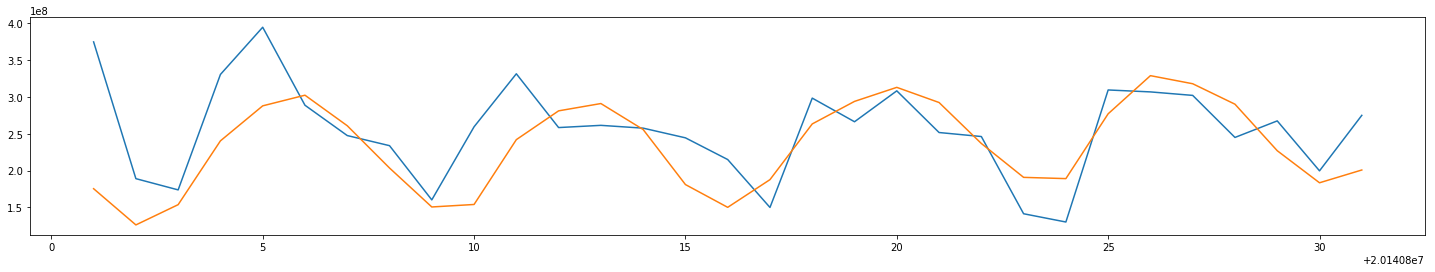

In [21]:
test = pd.read_csv('test.csv')
predict=pd.read_csv('submit_lstm.csv')

plt.plot(list(test['report_date']),list(test['total_purchase_amt']))
plt.plot(predict['report_date'],predict['purchase'])
plt.show()

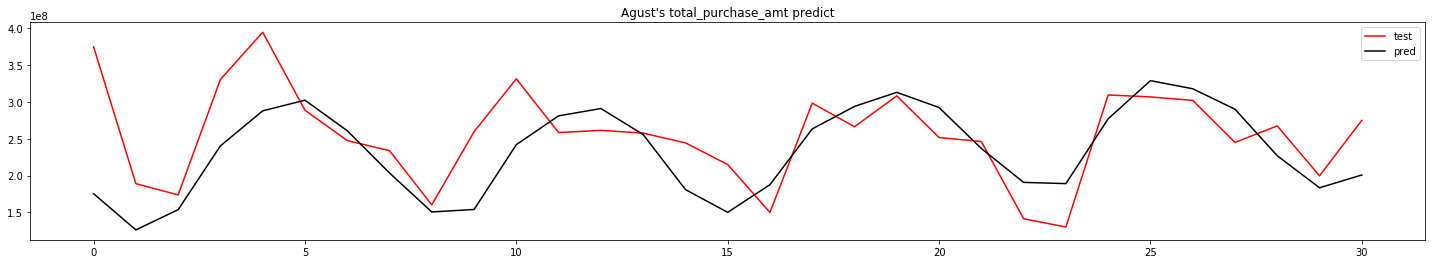

In [22]:
import matplotlib.pyplot as plt
f = plt.figure(facecolor='white')
plt.plot(test['total_purchase_amt'], color='red', label='test')
plt.plot(predict['purchase'], color='black', label='pred')
plt.legend()
plt.title('Agust\'s total_purchase_amt predict')
plt.draw()

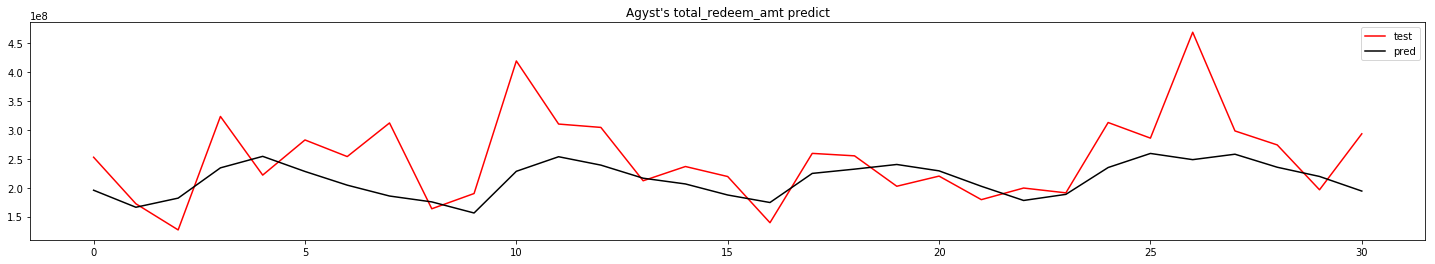

In [23]:
f = plt.figure(facecolor='white')
plt.plot(test['total_redeem_amt'], color='red', label='test')
plt.plot(predict['redeem'], color='black', label='pred')
plt.legend()
plt.title('Agyst\'s total_redeem_amt predict')
plt.draw()

In [24]:
purchase_error = np.divide(np.abs(np.array(test['total_purchase_amt']-1)
                - np.array(predict['purchase']).T), test['total_purchase_amt'])
print(purchase_error)
print(purchase_error.mean(),purchase_error.var(),purchase_error.std())

0     0.531996
1     0.332358
2     0.115397
3     0.272809
4     0.270490
5     0.047233
6     0.053901
7     0.129684
8     0.060111
9     0.406582
10    0.269833
11    0.087852
12    0.113291
13    0.007282
14    0.259543
15    0.301939
16    0.251923
17    0.117449
18    0.103785
19    0.015381
20    0.161911
21    0.038261
22    0.349559
23    0.452804
24    0.104542
25    0.071884
26    0.052400
27    0.184246
28    0.151396
29    0.081223
30    0.269864
Name: total_purchase_amt, dtype: float64
0.18280413584101515 0.01865246938609101 0.13657404360306175


In [25]:
redeem_error = np.divide(np.abs(np.array(test['total_redeem_amt']-1)
                - np.array(predict['redeem']).T), test['total_redeem_amt'])
print(redeem_error)
print(redeem_error.mean(),redeem_error.var(),redeem_error.std())

0     0.225432
1     0.034978
2     0.431553
3     0.274716
4     0.145871
5     0.192573
6     0.194373
7     0.404430
8     0.072490
9     0.176887
10    0.454740
11    0.181967
12    0.214009
13    0.020776
14    0.127213
15    0.145267
16    0.249629
17    0.133289
18    0.089971
19    0.185591
20    0.041161
21    0.128599
22    0.107524
23    0.013689
24    0.248477
25    0.092584
26    0.469494
27    0.134840
28    0.140622
29    0.117034
30    0.337262
Name: total_redeem_amt, dtype: float64
0.18667872542334077 0.015394585083502856 0.12407491722142254
